In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 

data = pd.read_excel ("./Database Analysis on superstore_sales.xlsx",sheet_name="Orders")

data
#data.describe()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014


#### **ASSIGNMENT QUESTIONS**

1.Number of Segments

2.How many products were shipped using first class, standard class and same day (how many products were shipped using each 
shipping mode)

3.What are the number of products per category

4.which sub category have the most products

5.Based on sales which market has the highest number

6.Which region has the highest profit

7.Give me the top product by quantity and sales

8.What is the most prefered shipping mode and how many products were shipped using each mode

9.What are the most profitable category and sub category

10.Which product was returned and to which market

11.Which customers returned product from which region and to which market

12.What is the average product sold per year

13.Which year has the highest number of return and sales

14.What is the highest average profit made in each region and market

In [2]:
selected_sheets= pd.read_excel('./Database Analysis on superstore_sales.xlsx', sheet_name=['Orders','Returns'])

selected_sheets

{'Orders':               order_id order_date  ship_date       ship_mode  \
 0         AG-2011-2040 2011-01-01 2011-01-06  Standard Class   
 1        IN-2011-47883 2011-01-01 2011-01-08  Standard Class   
 2         HU-2011-1220 2011-01-01 2011-01-05    Second Class   
 3      IT-2011-3647632 2011-01-01 2011-01-05    Second Class   
 4        IN-2011-47883 2011-01-01 2011-01-08  Standard Class   
 ...                ...        ...        ...             ...   
 51285   CA-2014-115427 2014-12-31 2015-01-04  Standard Class   
 51286     MO-2014-2560 2014-12-31 2015-01-05  Standard Class   
 51287   MX-2014-110527 2014-12-31 2015-01-02    Second Class   
 51288   MX-2014-114783 2014-12-31 2015-01-06  Standard Class   
 51289   CA-2014-156720 2014-12-31 2015-01-04  Standard Class   
 
           customer_name      segment             state        country  market  \
 0       Toby Braunhardt     Consumer       Constantine        Algeria  Africa   
 1           Joseph Holt     Consumer   New 

#### # **#### SUMMARIZE THE INFORMATION ON EACH SHEET**


In [3]:
Orders_sheet=pd.read_excel('./Database Analysis on superstore_sales.xlsx',sheet_name='Orders')
names_of_columns=Orders_sheet.columns.tolist()

names_of_columns

['order_id',
 'order_date',
 'ship_date',
 'ship_mode',
 'customer_name',
 'segment',
 'state',
 'country',
 'market',
 'region',
 'product_id',
 'category',
 'sub_category',
 'product_name',
 'sales',
 'quantity',
 'discount',
 'profit',
 'shipping_cost',
 'order_priority',
 'year']

#### **NUMBER OF SEGMENTS**

In [4]:
num_of_seg= data['segment'].nunique()

num_of_seg


3

In [5]:
num_of_seg= data['segment'].value_counts().reset_index(name='total segment')

num_of_seg

,segment,total segment
0,Consumer,26518
1,Corporate,15429
2,Home Office,9343


In [6]:
num_of_seg = data.groupby('segment').size().reset_index(name='No of segment')

num_of_seg



,segment,No of segment
0,Consumer,26518
1,Corporate,15429
2,Home Office,9343


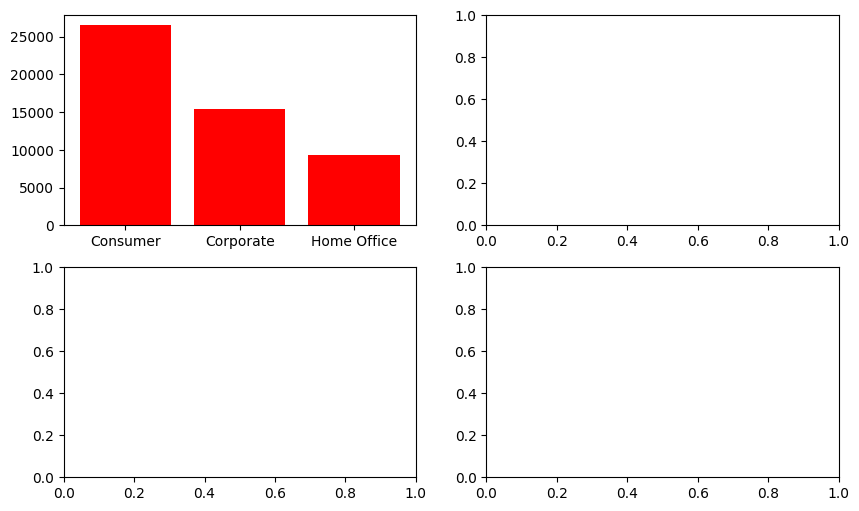

In [66]:
fig, axs = plt.subplots(2,2, figsize=(10,6))
 
axs[0,0].bar(num_of_seg["segment"], num_of_seg["No of segment"],color="red")

plt.show()

**HOW MANY PRODUCTS WERE SHIPPED USING FIRST CLASS, STANDARD CLASS AND SAME DAY (HOW MANY PRODUCTS WERE SHIPPED USING EACH 
SHIPPING MODE)**

In [8]:
#count of products or the number of times these products appeared in each of the shipping mode

shippeed_products= data.groupby("ship_mode").size().reset_index(name="Number of products")

shippeed_products

,ship_mode,Number of products
0,First Class,7505
1,Same Day,2701
2,Second Class,10309
3,Standard Class,30775


In [9]:
#this code refers to the number of quantity per each shipping mode
shippeed_products= data.groupby("ship_mode")["quantity"].sum().reset_index(name="No of products shipped")

shippeed_products

,ship_mode,No of products shipped
0,First Class,26039
1,Same Day,9230
2,Second Class,35724
3,Standard Class,107319


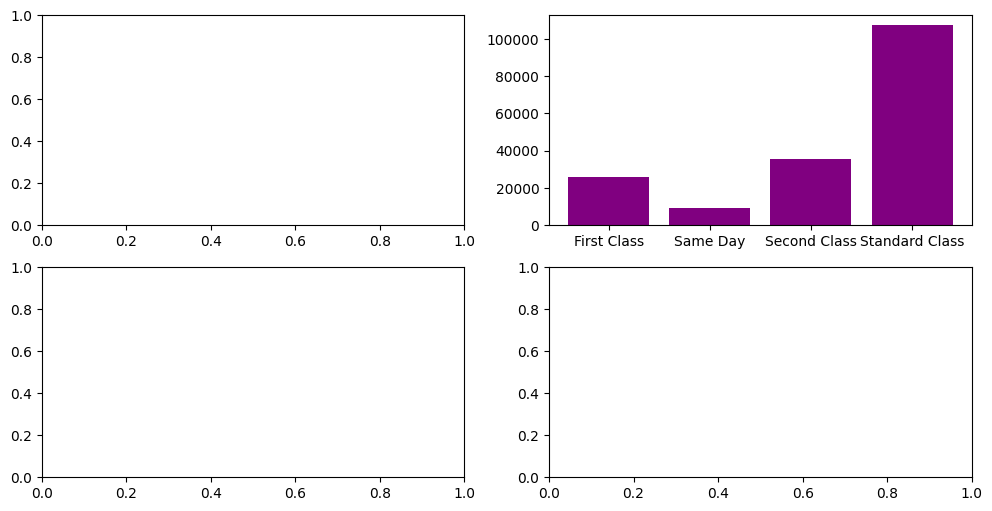

In [10]:
fig, axs = plt.subplots(2,2, figsize=(12,6))
 
axs[0,1].bar(shippeed_products["ship_mode"], shippeed_products["No of products shipped"],color="purple")

plt.show()

In [11]:
shippeed_products= data.groupby("ship_mode")["quantity"].sum().reset_index(name="No of products shipped")

#this code will give us a boolean result
Each_products_shipped= shippeed_products["ship_mode"].isin(["First Class", "Standard Class", "Same Day"])

#this code will list the result in a data frame format
Each_products_shipped2= shippeed_products[shippeed_products["ship_mode"].isin(["First Class", "Standard Class", "Same Day"])
]

#Each_products_shipped

Each_products_shipped2

,ship_mode,No of products shipped
0,First Class,26039
1,Same Day,9230
3,Standard Class,107319


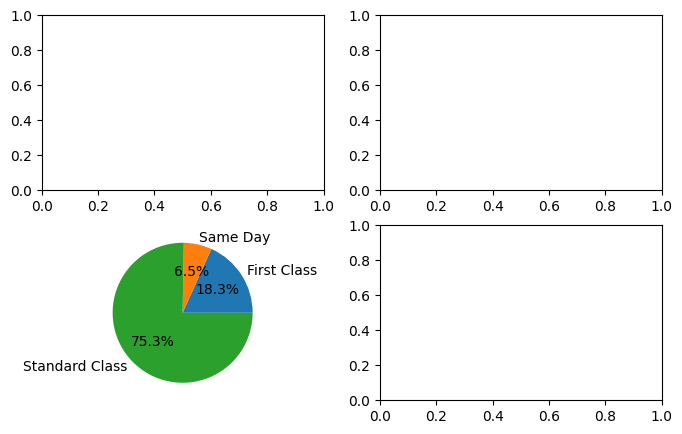

In [12]:
fig, axs = plt.subplots(2,2, figsize=(8,5))

axs[1,0].pie(Each_products_shipped2["No of products shipped"], labels=Each_products_shipped2["ship_mode"],autopct="%1.1f%%")

plt.show()

##### **WHAT ARE THE NUMBER OF PRODUCTS PER CATEGORY**

In [13]:
#this code tells us the number of times quantity of products appeared in each category
no_of_products_per_category= data.groupby("category")["quantity"].sum().reset_index(name="No of products per category")

no_of_products_per_category

,category,No of products per category
0,Furniture,34954
1,Office Supplies,108182
2,Technology,35176


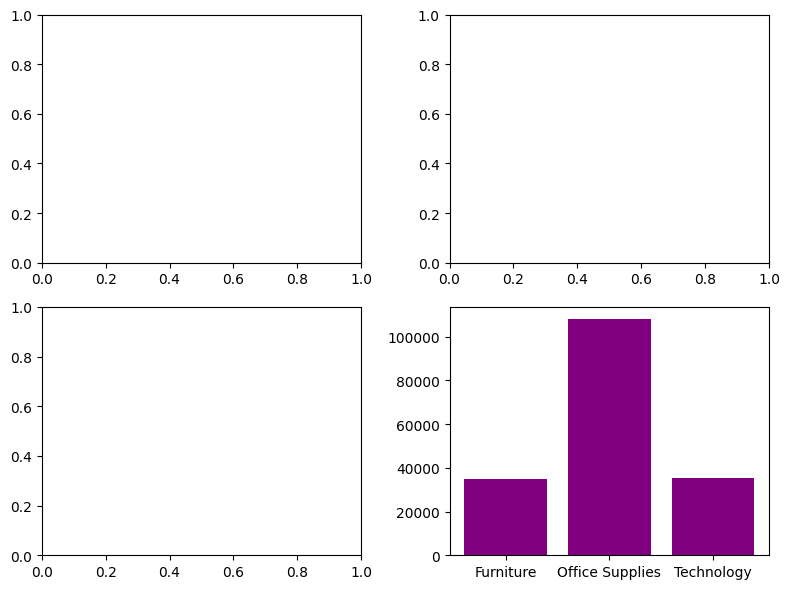

In [14]:
fig, axs = plt.subplots(2,2, figsize=(8,6))

axs[1,1].bar(no_of_products_per_category["category"], no_of_products_per_category["No of products per category"],color="purple")


plt.tight_layout()
plt.show()

#### **WHICH SUB CATEGORY HAVE THE MOST PRODUCT**

In [15]:
No_of_products_per_sub_category= data.groupby("sub_category")["quantity"].sum().reset_index(name="No of products per sub_category")

No_of_products_per_sub_category

,sub_category,No of products per sub_category
0,Accessories,10946
1,Appliances,6078
2,Art,16301
3,Binders,21429
4,Bookcases,8310
5,Chairs,12336
6,Copiers,7454
7,Envelopes,8380
8,Fasteners,8390
9,Furnishings,11225


In [16]:
#this code explains the number of times quantity appeared in sub_category or vice versa
No_of_products_per_sub_category= data.groupby("sub_category")["quantity"].sum().reset_index(name="No of products")

most_sub_category_products =  No_of_products_per_sub_category.loc[No_of_products_per_sub_category['No of products'].idxmax()]

print(f"The sub_category with the most product is {most_sub_category_products['sub_category']} with a total product of {most_sub_category_products['No of products']}.")

The sub_category with the most product is Binders with a total product of 21429.


In [17]:
#this code explains the highest number of product per category
No_of_products_per_sub_category= data.groupby("sub_category")["quantity"].sum().reset_index(name="No of products per sub_category")

most_sub_category_products =  No_of_products_per_sub_category.sort_values(by="No of products per sub_category", ascending=False).head(1)

most_sub_category_products

,sub_category,No of products per sub_category
3,Binders,21429


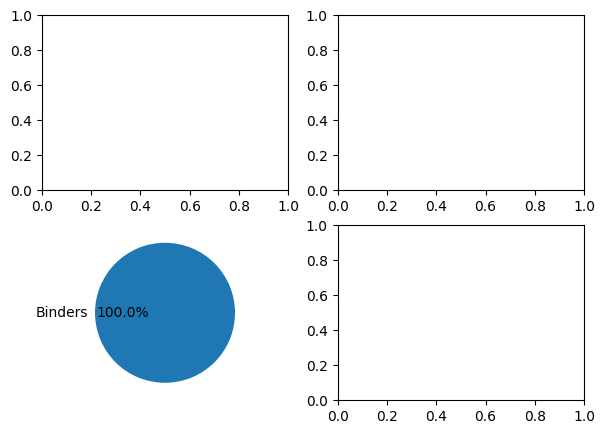

In [18]:
fig, axs = plt.subplots(2,2, figsize=(7,5))

axs[1,0].pie(most_sub_category_products["No of products per sub_category"], labels=most_sub_category_products["sub_category"],autopct="%1.1f%%")

plt.show()

#### **BASED ON SALES WHICH MARKET HAS THE HIGHEST NUMBER OR WHICH MARKET HAS THE HIGHEST NUMBER OF SALES**

In [19]:
sales_maarket= data.groupby("market")["sales"].sum().reset_index(name="No of sales")

sales_maarket


,market,No of sales
0,APAC,3.585744e+06
1,Africa,7.837732e+05
2,Canada,6.692817e+04
3,EMEA,8.061613e+05
4,EU,2.938089e+06
5,LATAM,2.164605e+06
6,US,2.297201e+06


In [20]:
sales_maarket= data.groupby("market")["sales"].sum().reset_index(name="No of sales")

highest_sales_maarket= sales_maarket.loc[sales_maarket["No of sales"].idxmax()]


print(f"The market {highest_sales_maarket['market']} is the highest number of sales with {highest_sales_maarket['No of sales']} sales.")




The market APAC is the highest number of sales with 3585744.129 sales.


In [21]:
highest_sales_maarket=  sales_maarket.sort_values(by="No of sales", ascending=False).head(1)

highest_sales_maarket

,market,No of sales
0,APAC,3585744.129


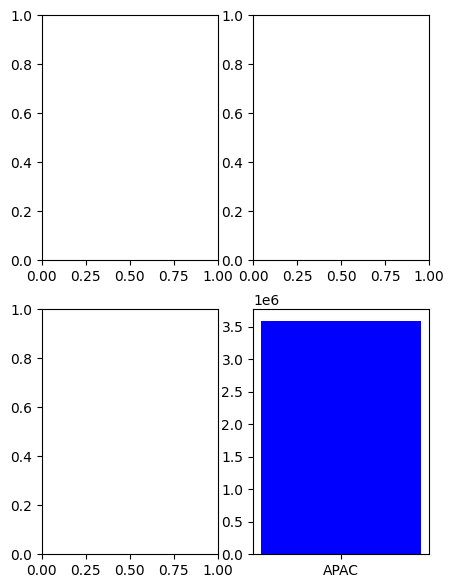

In [22]:
fig, axs = plt.subplots(2,2, figsize=(5,7))

axs[1,1].bar(highest_sales_maarket["market"], highest_sales_maarket["No of sales"],color="blue")

plt.show()

### **WHICH REGION HAS THE HIGHEST PROFIT**

In [23]:
profits_per_region= data.groupby("region")["profit"].sum().reset_index(name="Total profits per region")

profits_per_region

,region,Total profits per region
0,Africa,88871.63100
1,Canada,17817.39000
2,Caribbean,34571.32104
3,Central,311403.98164
4,Central Asia,132480.18700
5,EMEA,43897.97100
6,East,91522.78000
7,North,194597.95252
8,North Asia,165578.42100
9,Oceania,121666.64200


In [24]:
region_with_highest_profits= profits_per_region.loc[profits_per_region["Total profits per region"].idxmax()]

print(f"The region with the highest number of profits is {region_with_highest_profits['region']} with {region_with_highest_profits['Total profits per region']} profits.")

The region with the highest number of profits is Central with 311403.98163999995 profits.


In [25]:
region_with_highest_profits=  profits_per_region.sort_values(by="Total profits per region", ascending=False).head(1)

region_with_highest_profits

,region,Total profits per region
3,Central,311403.98164


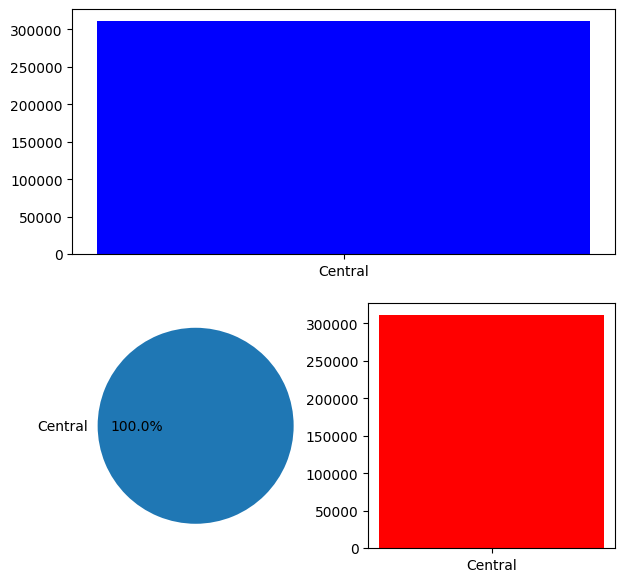

In [26]:
fig = plt.figure(figsize=(7,7))

gridspace= gridspec.GridSpec(2,2,figure=fig)

gs1= fig.add_subplot(gridspace[0,:])
gs1.bar(region_with_highest_profits["region"], region_with_highest_profits["Total profits per region"],color="blue")
gs2= fig.add_subplot(gridspace[1,0])
gs2.pie(region_with_highest_profits["Total profits per region"], labels=region_with_highest_profits["region"],autopct="%1.1f%%")
gs3= fig.add_subplot(gridspace[1,1])
gs3.bar(region_with_highest_profits["region"], region_with_highest_profits["Total profits per region"],color="red")
# gs4= fig.add_subplot(gridspace[1,1])

plt.show()

#### **GIVE ME THE TOP PRODUCT BY QUANTITY AND SALES**

In [27]:
product_by_quantity= data.groupby("product_name")["quantity"].sum().reset_index(name="quantity per product name")

product_by_quantity

,product_name,quantity per product name
0,"""While you Were Out"" Message Book, One Form pe...",8
1,"#10 Gummed Flap White Envelopes, 100/Box",11
2,#10 Self-Seal White Envelopes,10
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",32
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37
...,...,...
3783,iKross Bluetooth Portable Keyboard + Cell Phon...,24
3784,iOttie HLCRIO102 Car Mount,12
3785,iOttie XL Car Mount,14
3786,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,29


In [28]:
top_product_by_quantity= product_by_quantity.loc[product_by_quantity["quantity per product name"].idxmax()]

print(f"The product name with the highest number of product is {top_product_by_quantity['product_name']} with total product of {top_product_by_quantity['quantity per product name']}.")

The product name with the highest number of product is Staples with total product of 876.


In [29]:
product_by_sales= data.groupby("product_name")["sales"].sum().reset_index(name="Total no of sales")

product_by_sales

,product_name,Total no of sales
0,"""While you Were Out"" Message Book, One Form pe...",25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300
2,#10 Self-Seal White Envelopes,108.682
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
...,...,...
3783,iKross Bluetooth Portable Keyboard + Cell Phon...,477.660
3784,iOttie HLCRIO102 Car Mount,215.892
3785,iOttie XL Car Mount,223.888
3786,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,442.554


In [30]:
top_product_by_sales= product_by_sales.loc[product_by_sales["Total no of sales"].idxmax()]

print(f"The product name with the highest number of sales is {top_product_by_sales['product_name']} with total sales of {top_product_by_sales['Total no of sales']}.")

The product name with the highest number of sales is Apple Smart Phone, Full Size with total sales of 86935.7786.


#### **ALTERNATIVELY**

In [31]:
# Group by product_name and count the number by quantity 
product_by_quantity = data.groupby('product_name')['quantity'].sum().reset_index(name='quantity per product name')

# Sort by quantity per product name descending and get top 1
top_product_by_quantity = product_by_quantity.sort_values(by='quantity per product name', ascending=False).head(1)

top_product_by_quantity

,product_name,quantity per product name
3275,Staples,876


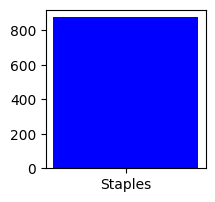

In [32]:
fig = plt.figure(figsize=(7,7))

gridspace= gridspec.GridSpec(3,3,figure=fig)

gs1= fig.add_subplot(gridspace[0,0])
gs1.bar(top_product_by_quantity["product_name"], top_product_by_quantity["quantity per product name"],color="blue")
# gs2= fig.add_subplot(gridspace[1,0])
# gs2.pie(region_with_highest_profits["Total profits per region"], labels=region_with_highest_profits["region"],autopct="%1.1f%%")
# gs3= fig.add_subplot(gridspace[1,1])
# gs3.bar(region_with_highest_profits["region"], region_with_highest_profits["Total profits per region"],color="red")


plt.show()

In [33]:
# Group by product_name and count the nos of sales 
product_by_sales = data.groupby('product_name')['sales'].sum().reset_index(name='Total no of sales')

# Sort by total no of sales descending and get top 1
top_product_by_sales = product_by_sales.sort_values(by='Total no of sales', ascending=False).head(1)

top_product_by_sales

,product_name,Total no of sales
310,"Apple Smart Phone, Full Size",86935.7786


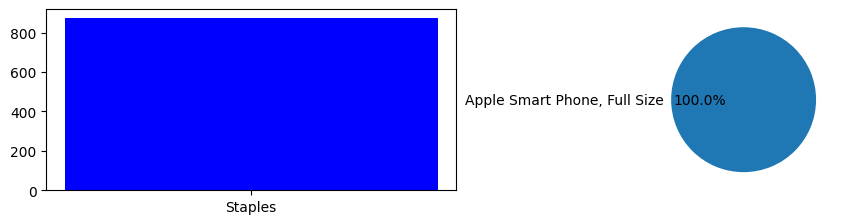

In [34]:
fig = plt.figure(figsize=(18,8))

gridspace= gridspec.GridSpec(3,3,figure=fig)

gs1= fig.add_subplot(gridspace[0,0])
gs1.bar(top_product_by_quantity["product_name"], top_product_by_quantity["quantity per product name"],color="blue")
gs2= fig.add_subplot(gridspace[0,1])
gs2.pie(top_product_by_sales["Total no of sales"], labels=top_product_by_sales["product_name"],autopct="%1.1f%%")
# gs3= fig.add_subplot(gridspace[1,1])
# gs3.bar(region_with_highest_profits["region"], region_with_highest_profits["Total profits per region"],color="red")


plt.show()

#### **WHAT IS THE MOST PREFERED SHIPPING MODE AND HOW MANY PRODUCTS WERE SHIPPED TO EACH COUNTRY**

In [35]:
products_shipped_to_each_country= data.groupby("country")["quantity"].sum().reset_index(name="Total quantity of products shipped to each country")

print(products_shipped_to_each_country)

         country  Total quantity of products shipped to each country
0    Afghanistan                                                228 
1        Albania                                                 40 
2        Algeria                                                454 
3         Angola                                                317 
4      Argentina                                               1504 
..           ...                                                ... 
142    Venezuela                                                774 
143      Vietnam                                                996 
144        Yemen                                                 71 
145       Zambia                                                251 
146     Zimbabwe                                                190 

[147 rows x 2 columns]


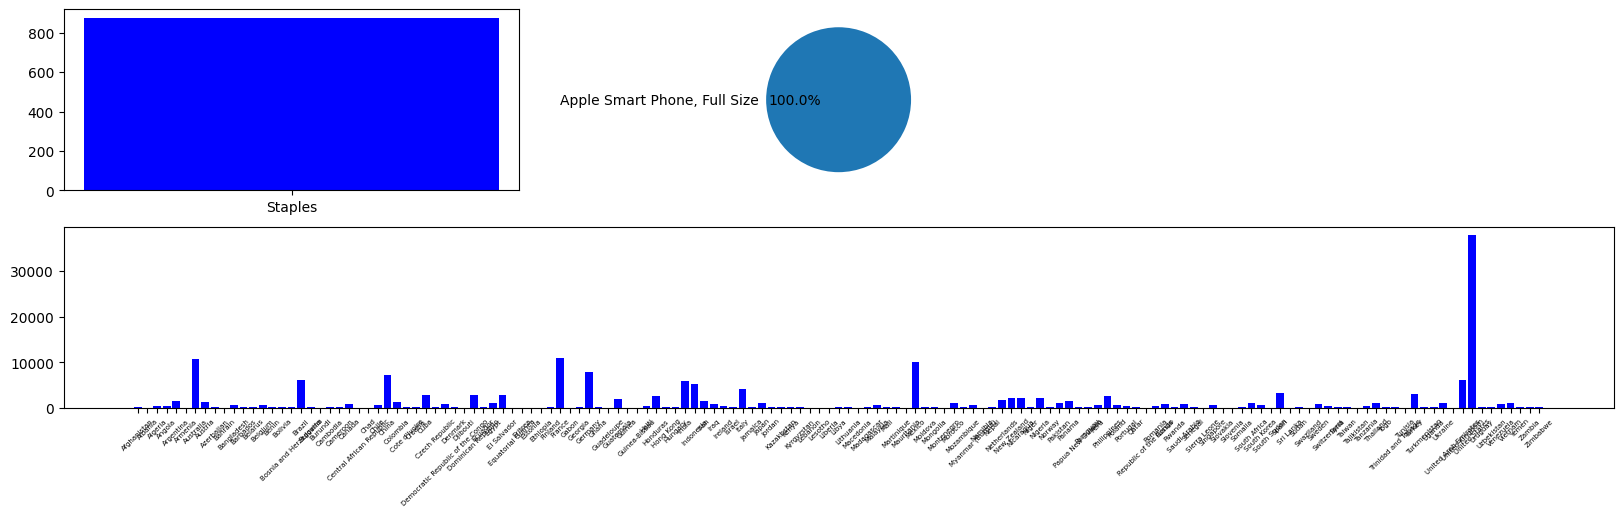

In [36]:
fig = plt.figure(figsize=(20,8))

gridspace= gridspec.GridSpec(3,3,figure=fig)

gs1= fig.add_subplot(gridspace[0,0])
gs1.bar(top_product_by_quantity["product_name"], top_product_by_quantity["quantity per product name"],color="blue")
gs2= fig.add_subplot(gridspace[0,1])
gs2.pie(top_product_by_sales["Total no of sales"], labels=top_product_by_sales["product_name"],autopct="%1.1f%%")
gs3= fig.add_subplot(gridspace[1,:])
gs3.bar(products_shipped_to_each_country["country"], products_shipped_to_each_country["Total quantity of products shipped to each country"],color="blue")
plt.xticks(rotation=45, fontsize=5)


plt.show()

In [37]:
# Group by product_name and count the nos of sales 
shipping_mode = data.groupby('ship_mode')['quantity'].sum().reset_index(name='Highest quantity of product shipped')

# Sort by total no of sales descending and get top 1
most_prefered_shipping_mode = shipping_mode.sort_values(by='Highest quantity of product shipped', ascending=False).head(1)

most_prefered_shipping_mode

,ship_mode,Highest quantity of product shipped
3,Standard Class,107319


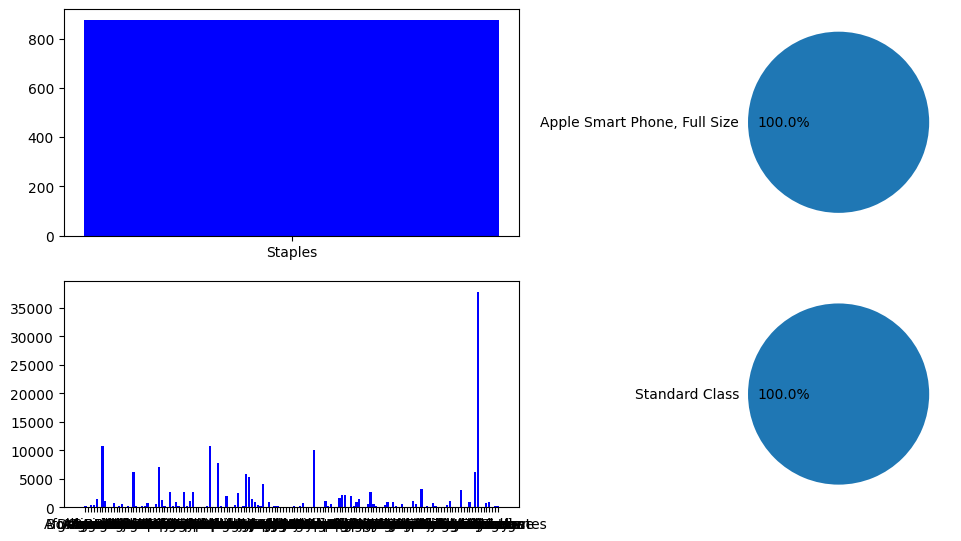

In [38]:
fig = plt.figure(figsize=(20,10))

gridspace= gridspec.GridSpec(3,3,figure=fig)

gs1= fig.add_subplot(gridspace[0,0])
gs1.bar(top_product_by_quantity["product_name"], top_product_by_quantity["quantity per product name"],color="blue")
gs2= fig.add_subplot(gridspace[0,1])
gs2.pie(top_product_by_sales["Total no of sales"], labels=top_product_by_sales["product_name"],autopct="%1.1f%%")
gs3= fig.add_subplot(gridspace[1,0])
gs3.bar(products_shipped_to_each_country["country"], products_shipped_to_each_country["Total quantity of products shipped to each country"],color="blue")

gs4= fig.add_subplot(gridspace[1,1])
gs4.pie(most_prefered_shipping_mode["Highest quantity of product shipped"], labels=most_prefered_shipping_mode["ship_mode"],autopct="%1.1f%%")
plt.show()

#### **WHAT ARE THE MOST PROFITABLE CATEGORY AND SUB CATEGORY**

In [39]:
profitable_sub_category= data.groupby("sub_category")["profit"].sum().reset_index(name="Total no of profit per sub_category")

profitable_sub_category

,sub_category,Total no of profit per sub_category
0,Accessories,129626.30620
1,Appliances,141680.58940
2,Art,57953.91090
3,Binders,72449.84600
4,Bookcases,161924.41950
5,Chairs,141973.79750
6,Copiers,258567.54818
7,Envelopes,29601.11630
8,Fasteners,11525.42410
9,Furnishings,46967.42550


In [40]:
# Group by product_name and count the nos of sales 
profitable_sub_category = data.groupby('sub_category')['profit'].sum().reset_index(name='Total no of profit per sub_category')

# Sort by total no of sales descending and get top 1
most_profitable_sub_category = profitable_sub_category.sort_values(by='Total no of profit per sub_category', ascending=False).head(1)

most_profitable_sub_category

,sub_category,Total no of profit per sub_category
6,Copiers,258567.54818


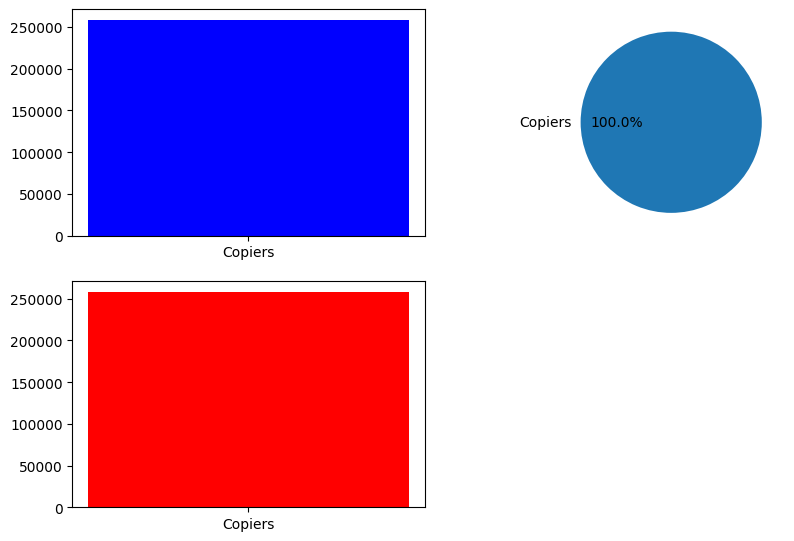

In [41]:
fig = plt.figure(figsize=(10,10))

gridspace= gridspec.GridSpec(3,2,figure=fig)

gs1= fig.add_subplot(gridspace[0,0])
gs1.bar(most_profitable_sub_category["sub_category"], most_profitable_sub_category["Total no of profit per sub_category"],color="blue")
gs2= fig.add_subplot(gridspace[0,1])
gs2.pie(most_profitable_sub_category["Total no of profit per sub_category"], labels=most_profitable_sub_category["sub_category"],autopct="%1.1f%%")
gs3= fig.add_subplot(gridspace[1,0])
gs3.bar(most_profitable_sub_category["sub_category"], most_profitable_sub_category["Total no of profit per sub_category"],color="red")

plt.show()

In [42]:
profitable_category= data.groupby("category")["profit"].sum().reset_index(name="Total no of profit per category")

profitable_category

,category,Total no of profit per category
0,Furniture,286782.25380
1,Office Supplies,518473.83430
2,Technology,663778.73318


In [43]:
# Group by product_name and count the nos of sales 
profitable_category = data.groupby('category')['profit'].sum().reset_index(name='Total no of profit per category')

# Sort by total no of sales descending and get top 1
most_profitable_category = profitable_category.sort_values(by='Total no of profit per category', ascending=False).head(1)

most_profitable_category

,category,Total no of profit per category
2,Technology,663778.73318


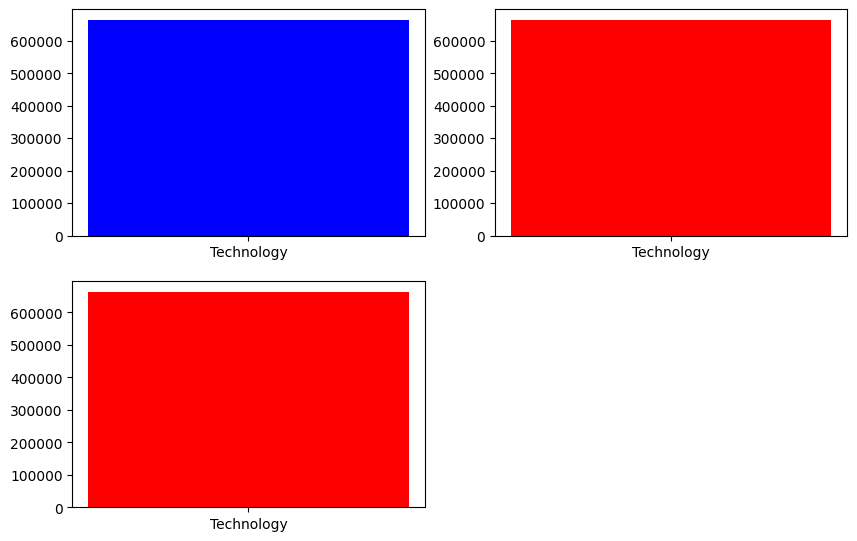

In [44]:
fig = plt.figure(figsize=(10,10))

gridspace= gridspec.GridSpec(3,2,figure=fig)

gs4= fig.add_subplot(gridspace[0,0])
gs4.bar(most_profitable_category["category"], most_profitable_category["Total no of profit per category"],color="blue")
gs5= fig.add_subplot(gridspace[0,1])
gs5.bar(most_profitable_category["category"], most_profitable_category["Total no of profit per category"],color="red")
gs6= fig.add_subplot(gridspace[1,0])
gs6.bar(most_profitable_category["category"], most_profitable_category["Total no of profit per category"],color="red")


plt.show()

In [45]:
profitable_category= data.groupby("category")["profit"].sum().reset_index(name="Total no of profit per category")

most_profitable_category= profitable_category.loc[profitable_category["Total no of profit per category"].idxmax()]

print(f"The most profitable sub_category is {most_profitable_category['category']} with total profit of {most_profitable_category['Total no of profit per category']}.")

#most_profitable_sub_category

The most profitable sub_category is Technology with total profit of 663778.73318.


#### **WHICH PRODUCT WAS RETURNED AND TO WHICH MARKET**

In [46]:
selected_sheets["Returns"].rename(columns={"Market": "market"}, inplace=True)
#selected_sheets["Returns"].columns.tolist()

Orders_sheet= selected_sheets["Orders"][["market", "product_name"]]

Returns_sheet= selected_sheets["Returns"][["market", "Returned"]]

merged_sheets= pd.merge(Orders_sheet, Returns_sheet, on="market", how= "inner")

#selected_sheets["Returns"].columns.tolist()
#print(merged_sheets.head())
merged_sheets

,market,product_name,Returned
0,APAC,"Acme Trimmer, High Speed",Yes
1,APAC,"Acme Trimmer, High Speed",Yes
2,APAC,"Acme Trimmer, High Speed",Yes
3,APAC,"Acme Trimmer, High Speed",Yes
4,APAC,"Acme Trimmer, High Speed",Yes
...,...,...,...
9153905,LATAM,"Hon Legal Exhibit Labels, Alphabetical",Yes
9153906,LATAM,"Hon Legal Exhibit Labels, Alphabetical",Yes
9153907,LATAM,"Hon Legal Exhibit Labels, Alphabetical",Yes
9153908,LATAM,"Hon Legal Exhibit Labels, Alphabetical",Yes


#### **WHICH CUSTOMERS RETURNED PRODUCT FROM WHICH REGION AND TO WHICH MARKET**

In [47]:
selected_sheets["Returns"].rename(columns={"Market": "market"}, inplace=True)
#selected_sheets["Returns"].columns.tolist()

Orders_sheet= selected_sheets["Orders"][["market","customer_name", "region"]]

Returns_sheet= selected_sheets["Returns"][["market", "Returned"]]

merged_sheets= pd.merge(Orders_sheet, Returns_sheet, on="market", how= "inner")

#selected_sheets["Returns"].columns.tolist()
#print(merged_sheets.head())
merged_sheets

,market,customer_name,region,Returned
0,APAC,Joseph Holt,Oceania,Yes
1,APAC,Joseph Holt,Oceania,Yes
2,APAC,Joseph Holt,Oceania,Yes
3,APAC,Joseph Holt,Oceania,Yes
4,APAC,Joseph Holt,Oceania,Yes
...,...,...,...,...
9153905,LATAM,Tamara Dahlen,North,Yes
9153906,LATAM,Tamara Dahlen,North,Yes
9153907,LATAM,Tamara Dahlen,North,Yes
9153908,LATAM,Tamara Dahlen,North,Yes


### **WHAT IS THE AVERAGE PRODUCT SOLD PER YEAR**

In [48]:
average_product_sold_per_year= data.groupby("year")["sales"].mean().reset_index(name="Average product sold per year")

average_product_sold_per_year

,year,Average product sold per year
0,2011,251.105901
1,2012,244.247281
2,2013,246.811106
3,2014,245.272139


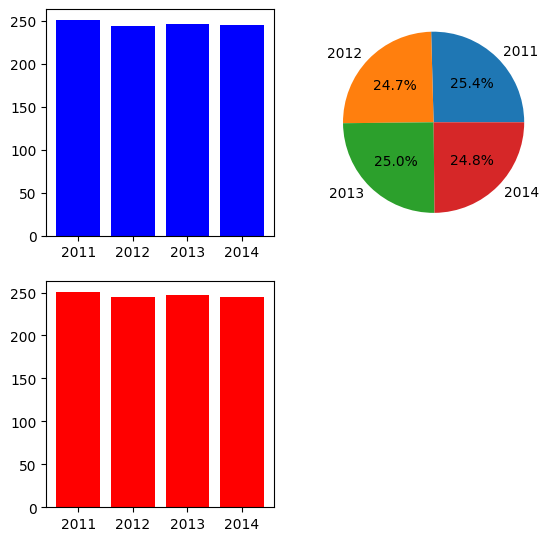

In [49]:
fig = plt.figure(figsize=(10,10))

gridspace= gridspec.GridSpec(3,3,figure=fig)

gs1= fig.add_subplot(gridspace[0,0])
gs1.bar(average_product_sold_per_year["year"], average_product_sold_per_year["Average product sold per year"],color="blue")
gs2= fig.add_subplot(gridspace[0,1])
gs2.pie(average_product_sold_per_year["Average product sold per year"], labels=average_product_sold_per_year["year"],autopct="%1.1f%%")
gs3= fig.add_subplot(gridspace[1,0])
gs3.bar(average_product_sold_per_year["year"], average_product_sold_per_year["Average product sold per year"],color="red")

plt.show()

### **WHICH YEAR HAS THE HIGHEST NUMBER OF RETURN AND SALES**

In [50]:
selected_sheets["Returns"].rename(columns={"Market": "market"}, inplace=True)
#selected_sheets["Returns"].columns.tolist()

Orders_sheet= selected_sheets["Orders"][["market","year","sales"]]

Returns_sheet= selected_sheets["Returns"][["market", "Returned"]]

merged_sheets= pd.merge(Orders_sheet, Returns_sheet, on="market", how= "inner")

#selected_sheets["Returns"].columns.tolist()
#print(merged_sheets.head())
merged_sheets

,market,year,sales,Returned
0,APAC,2011,120.366,Yes
1,APAC,2011,120.366,Yes
2,APAC,2011,120.366,Yes
3,APAC,2011,120.366,Yes
4,APAC,2011,120.366,Yes
...,...,...,...,...
9153905,LATAM,2014,7.120,Yes
9153906,LATAM,2014,7.120,Yes
9153907,LATAM,2014,7.120,Yes
9153908,LATAM,2014,7.120,Yes


In [51]:
highest_number_of_return_and_sales= merged_sheets.loc[merged_sheets["sales"].idxmax()]

print(f"The year with the highest number of return and sales is {highest_number_of_return_and_sales['year']} with sales of {highest_number_of_return_and_sales['sales']} and return of {highest_number_of_return_and_sales['Returned']}.")

The year with the highest number of return and sales is 2014 with sales of 7958.58 and return of Yes.


In [52]:
highest_number_of_return_and_sales= merged_sheets.sort_values(by="sales", ascending=False).head(1)

highest_number_of_return_and_sales

,market,year,sales,Returned
7825246,EU,2014,7958.58,Yes


### **WHAT IS THE HIGHEST AVERAGE PROFIT MADE IN EACH REGION AND MARKET**

In [53]:
average_profit_for_each_region= data.groupby("region")["profit"].mean().reset_index(name="Average profit per region")

average_profit_for_each_region

,region,Average profit per region
0,Africa,19.374674
1,Canada,46.399453
2,Caribbean,20.456403
3,Central,28.011512
4,Central Asia,64.687591
5,EMEA,8.728966
6,East,32.135808
7,North,40.668329
8,North Asia,70.820539
9,Oceania,34.891495


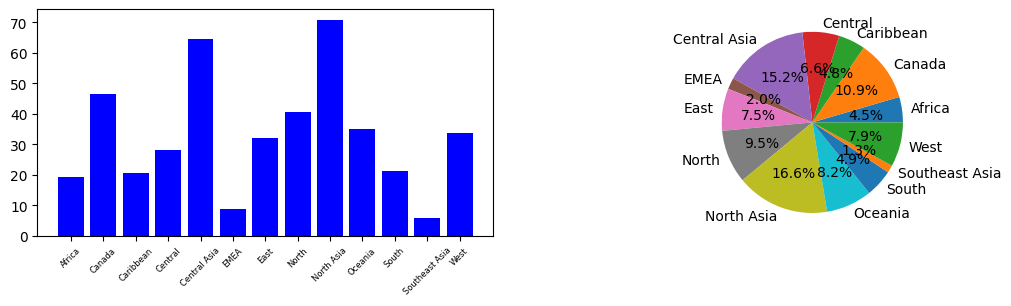

In [54]:
fig = plt.figure(figsize=(20,10))

gridspace= gridspec.GridSpec(3,3,figure=fig)

gs1= fig.add_subplot(gridspace[0,0])
gs1.bar(average_profit_for_each_region["region"], average_profit_for_each_region["Average profit per region"],color="blue")
plt.xticks(rotation=45, fontsize=6)
gs2= fig.add_subplot(gridspace[0,1])
gs2.pie(average_profit_for_each_region["Average profit per region"], labels=average_profit_for_each_region["region"],autopct="%1.1f%%")


plt.show()

In [55]:
highest_average_profit_for_region= average_profit_for_each_region.sort_values(by="Average profit per region", ascending=False).head(1)

highest_average_profit_for_region

,region,Average profit per region
8,North Asia,70.820539


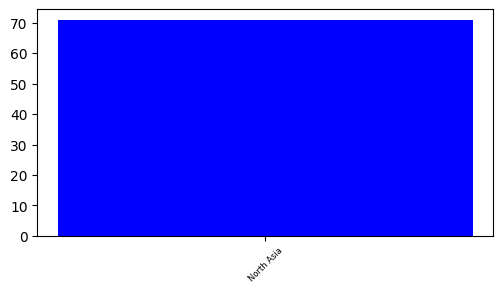

In [56]:
fig = plt.figure(figsize=(20,10))

gridspace= gridspec.GridSpec(3,3,figure=fig)

gs1= fig.add_subplot(gridspace[0,0])
gs1.bar(highest_average_profit_for_region["region"], highest_average_profit_for_region["Average profit per region"], color="blue")
plt.xticks(rotation=45, fontsize=6)

plt.show()

In [57]:
average_profit_for_each_market= data.groupby("market")["profit"].mean().reset_index(name="Average profit per market")

average_profit_for_each_market

,market,Average profit per market
0,APAC,39.772549
1,Africa,19.374674
2,Canada,46.399453
3,EMEA,8.728966
4,EU,37.282974
5,LATAM,21.531328
6,US,28.656896


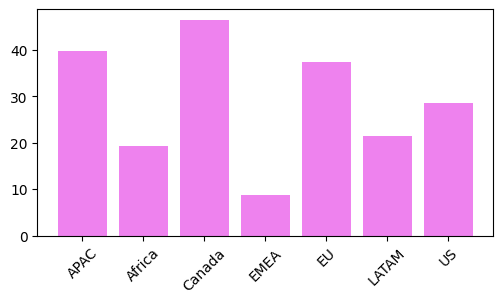

In [58]:
fig = plt.figure(figsize=(20,10))

gridspace= gridspec.GridSpec(3,3,figure=fig)

gs1= fig.add_subplot(gridspace[1,1])
gs1.bar(average_profit_for_each_market["market"], average_profit_for_each_market["Average profit per market"], color="violet")

plt.xticks(rotation=45, fontsize=10)

plt.show()

In [59]:
highest_average_profit_for_market= average_profit_for_each_market.sort_values(by="Average profit per market", ascending=False).head(1)

highest_average_profit_for_market

,market,Average profit per market
2,Canada,46.399453


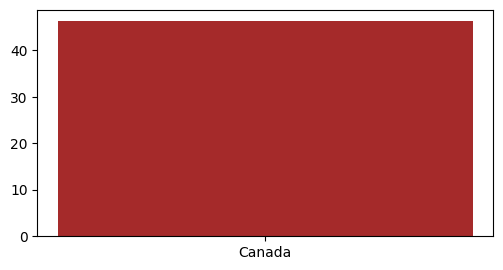

In [60]:
fig = plt.figure(figsize=(20,10))

gridspace= gridspec.GridSpec(3,3,figure=fig)

gs1= fig.add_subplot(gridspace[1,2])
gs1.bar(highest_average_profit_for_market["market"], highest_average_profit_for_market["Average profit per market"], color="brown")

plt.show()

In [61]:
highest_average_profit_for_region= average_profit_for_each_region.loc[average_profit_for_each_region["Average profit per region"].
idxmax()]

print(f"The highest average profit made for the region is {highest_average_profit_for_region['region']} while the profit is {highest_average_profit_for_region['Average profit per region']}.")

The highest average profit made for the region is North Asia while the profit is 70.82053934987168.


In [62]:
highest_average_profit_for_market= average_profit_for_each_market.loc[average_profit_for_each_market["Average profit per market"].idxmax()]

print(f"The highest average profit made for the market is {highest_average_profit_for_market['market']} while the profit is {highest_average_profit_for_market['Average profit per market']}.")

The highest average profit made for the market is Canada while the profit is 46.399453125.


#### **MINI DASHBOARD**

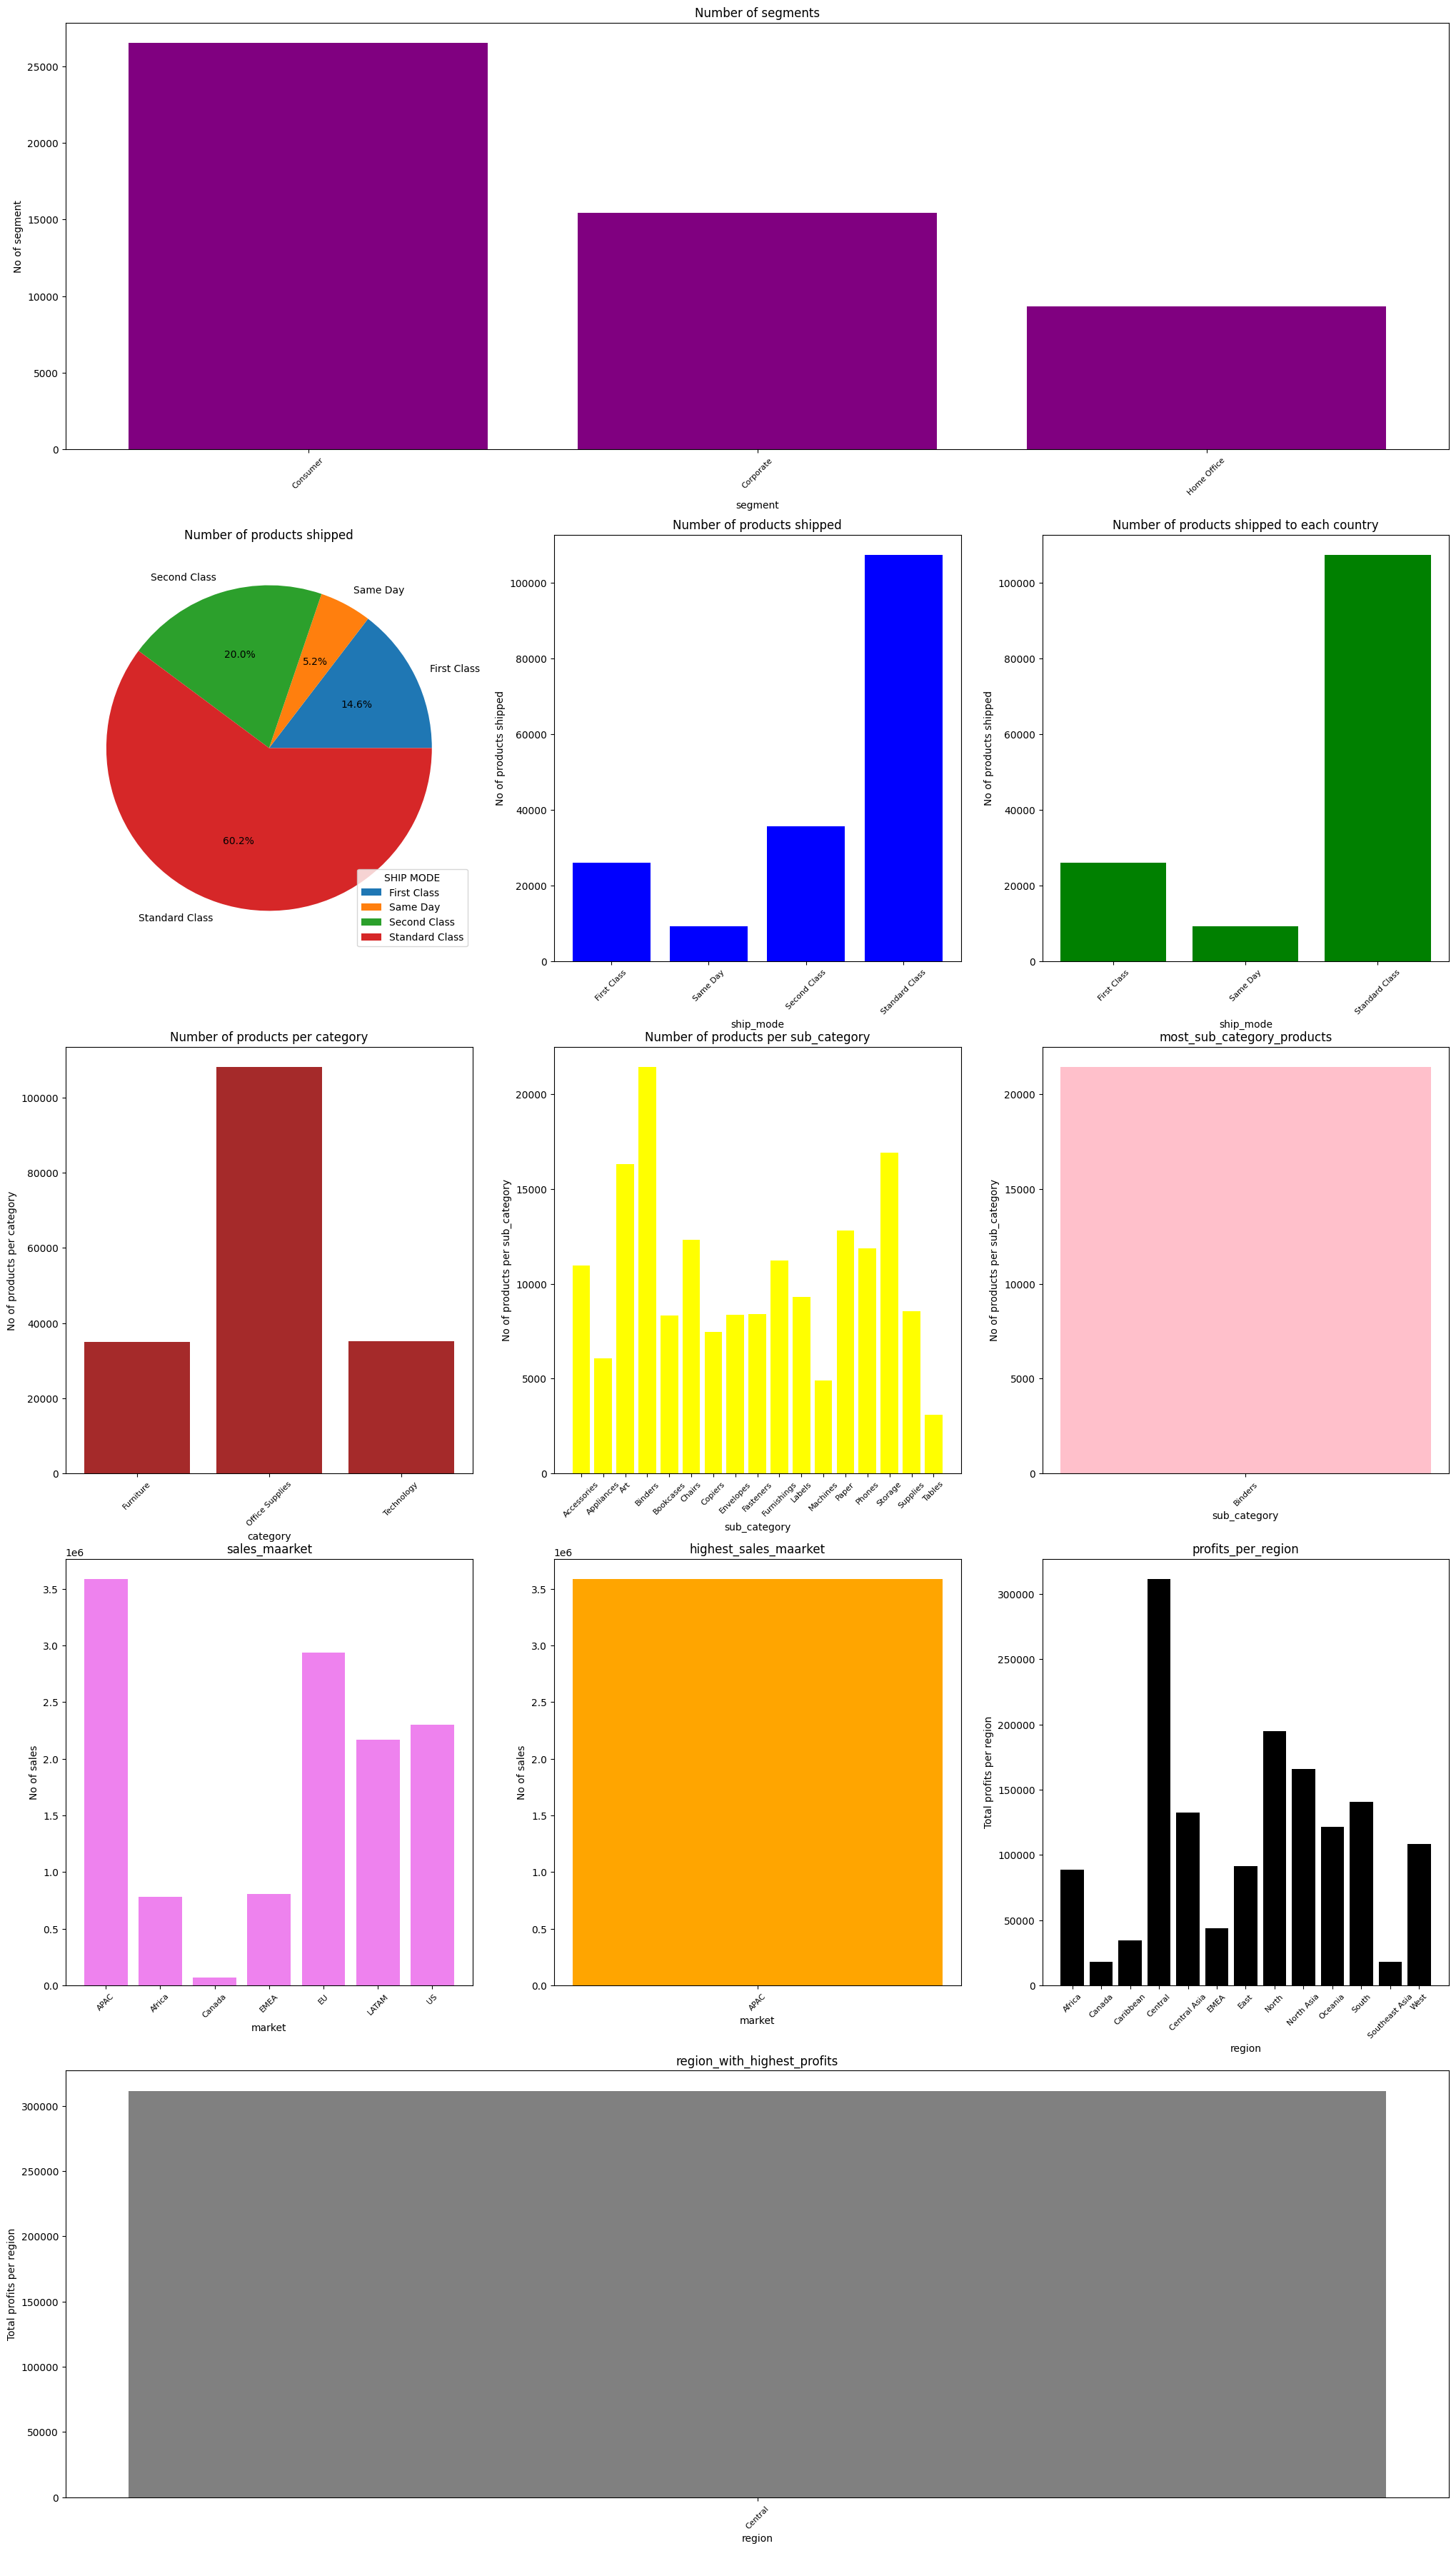

In [63]:
fig = plt.figure(figsize=(25,45))

gridspace= gridspec.GridSpec(5,3,figure=fig)

gs1= fig.add_subplot(gridspace[0,:])
gs1.bar(num_of_seg["segment"], num_of_seg["No of segment"],color="purple")
plt.xticks(rotation=45, fontsize=8)
plt.title('Number of segments')
plt.xlabel('segment')
plt.ylabel('No of segment')
gs2= fig.add_subplot(gridspace[1,0])
gs2.pie(shippeed_products["No of products shipped"], labels=shippeed_products["ship_mode"],autopct="%1.1f%%")
plt.title('Number of products shipped')
plt.legend(title="SHIP MODE")
gs3= fig.add_subplot(gridspace[1,1])
gs3.bar(shippeed_products["ship_mode"], shippeed_products["No of products shipped"],color="blue")
plt.title('Number of products shipped')
plt.xlabel('ship_mode')
plt.ylabel('No of products shipped')
plt.xticks(rotation=45, fontsize=8)
gs4= fig.add_subplot(gridspace[1,2])
gs4.bar(Each_products_shipped2["ship_mode"],Each_products_shipped2["No of products shipped"],color="green")
plt.title('Number of products shipped to each country')
plt.xlabel('ship_mode')
plt.ylabel('No of products shipped')
plt.xticks(rotation=45, fontsize=8)
gs5= fig.add_subplot(gridspace[2,0])
gs5.bar(no_of_products_per_category["category"], no_of_products_per_category["No of products per category"],color="brown")
plt.title('Number of products per category')
plt.xlabel('category')
plt.ylabel('No of products per category')
plt.xticks(rotation=45, fontsize=8)
gs6= fig.add_subplot(gridspace[2,1])
gs6.bar(No_of_products_per_sub_category["sub_category"], No_of_products_per_sub_category["No of products per sub_category"],color="yellow")
plt.title('Number of products per sub_category')
plt.xlabel('sub_category')
plt.ylabel('No of products per sub_category')
plt.xticks(rotation=45, fontsize=8)
gs7= fig.add_subplot(gridspace[2,2])
gs7.bar(most_sub_category_products["sub_category"], most_sub_category_products["No of products per sub_category"],color="pink")
plt.title('most_sub_category_products')
plt.xlabel('sub_category')
plt.ylabel('No of products per sub_category')
plt.xticks(rotation=45, fontsize=8)
gs8= fig.add_subplot(gridspace[3,0])
gs8.bar(sales_maarket["market"], sales_maarket["No of sales"],color="violet")
plt.title('sales_maarket')
plt.xlabel('market')
plt.ylabel('No of sales')
plt.xticks(rotation=45, fontsize=8)
gs9= fig.add_subplot(gridspace[3,1])
gs9.bar(highest_sales_maarket["market"], highest_sales_maarket["No of sales"],color="orange")
plt.title('highest_sales_maarket')
plt.xlabel('market')
plt.ylabel('No of sales')
plt.xticks(rotation=45, fontsize=8)
gs10= fig.add_subplot(gridspace[3,2])
gs10.bar(profits_per_region["region"], profits_per_region["Total profits per region"],color="black")
plt.title('profits_per_region')
plt.xlabel('region')
plt.ylabel('Total profits per region')
plt.xticks(rotation=45, fontsize=8)
gs11= fig.add_subplot(gridspace[4,:])
gs11.bar(region_with_highest_profits["region"], region_with_highest_profits["Total profits per region"],color="gray")
plt.title('region_with_highest_profits')
plt.xlabel('region')
plt.ylabel('Total profits per region')
plt.xticks(rotation=45, fontsize=8)

plt.show()

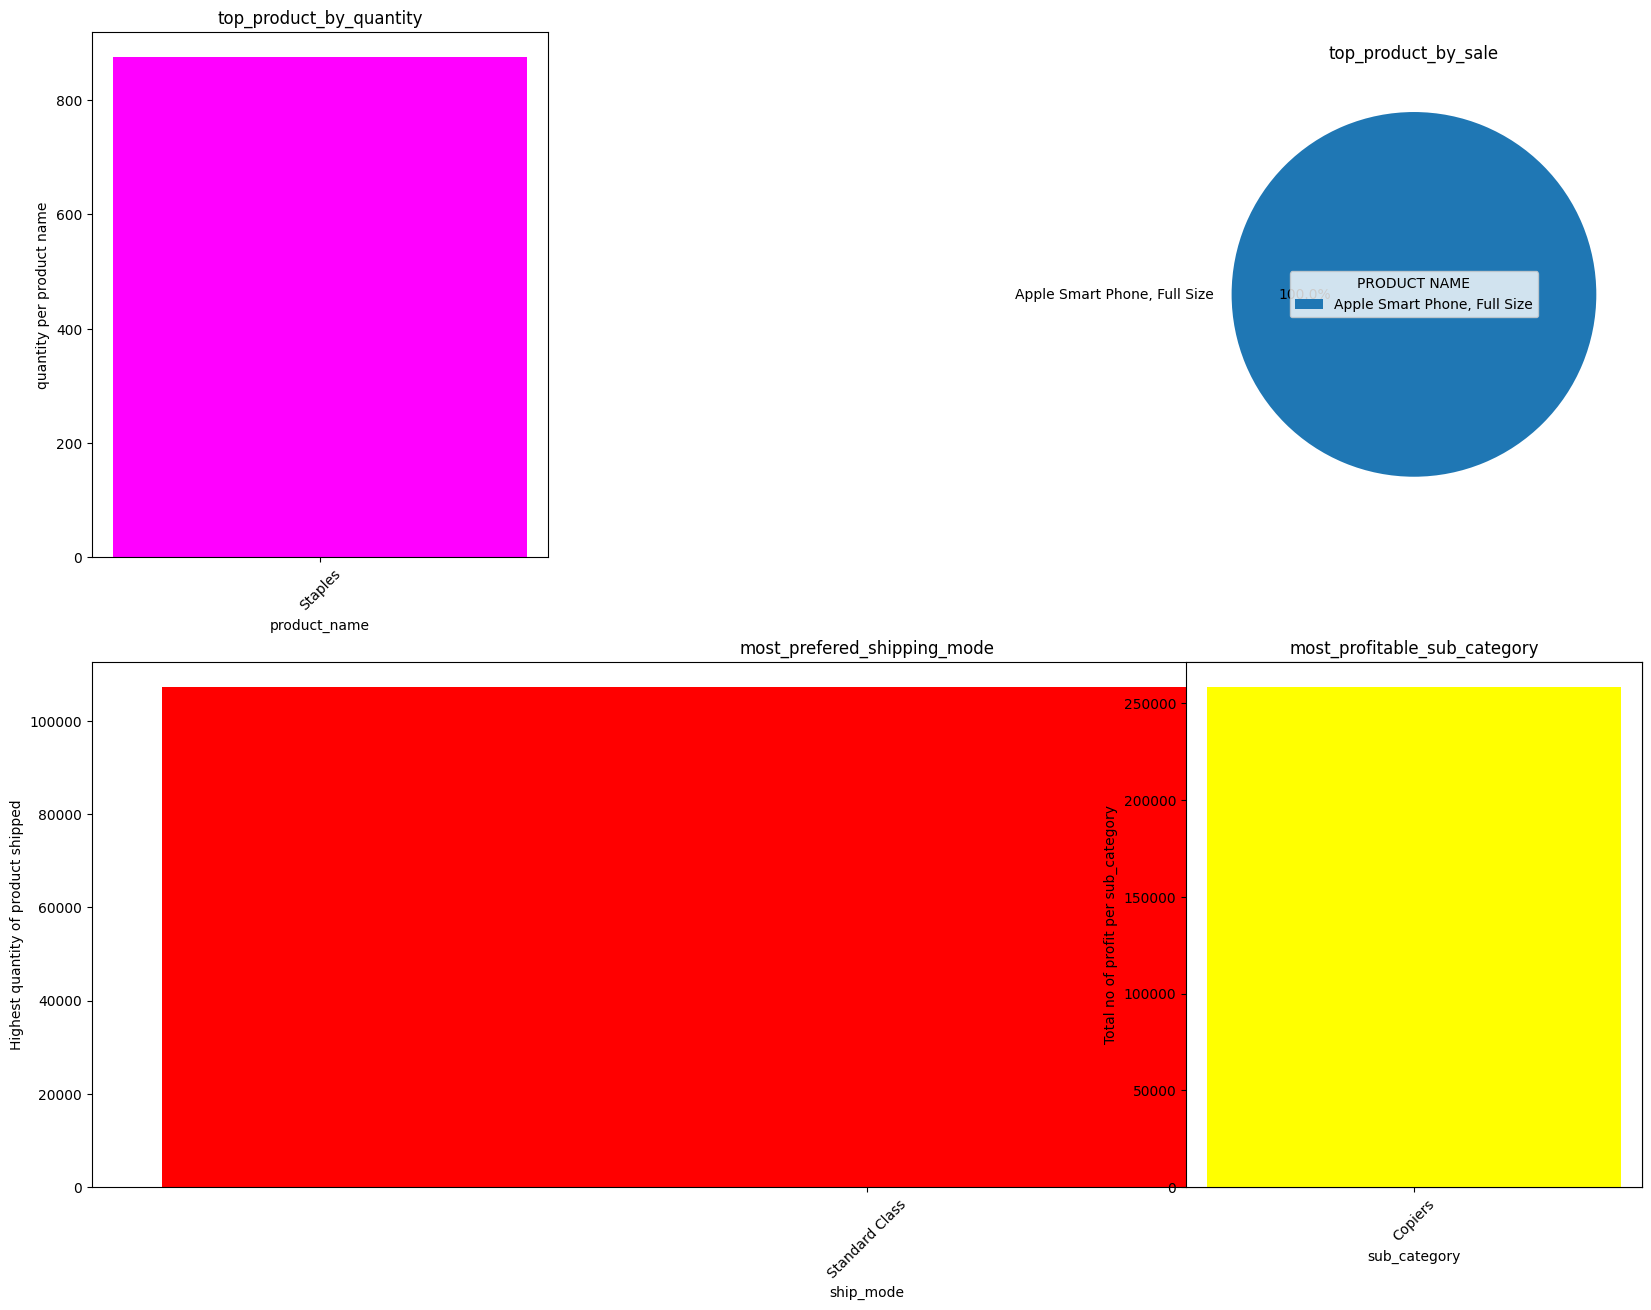

In [64]:
fig = plt.figure(figsize=(20,15))

gridspace= gridspec.GridSpec(2,3,figure=fig)

gs1= fig.add_subplot(gridspace[0,0])
gs1.bar(top_product_by_quantity["product_name"], top_product_by_quantity["quantity per product name"],color="magenta")
plt.title('top_product_by_quantity')
plt.xlabel('product_name')
plt.ylabel('quantity per product name')
plt.xticks(rotation=45, fontsize=10)
gs2= fig.add_subplot(gridspace[0,2])
gs2.pie(top_product_by_sales["Total no of sales"], labels=top_product_by_sales["product_name"],autopct="%1.1f%%")
plt.title('top_product_by_sale')
plt.legend(title="PRODUCT NAME")
gs3= fig.add_subplot(gridspace[1,:])
gs3.bar(most_prefered_shipping_mode["ship_mode"], most_prefered_shipping_mode["Highest quantity of product shipped"],color="red")
plt.title('most_prefered_shipping_mode')
plt.xlabel('ship_mode')
plt.ylabel('Highest quantity of product shipped')
plt.xticks(rotation=45, fontsize=10)
gs4= fig.add_subplot(gridspace[1,2])
gs4.bar(most_profitable_sub_category["sub_category"], most_profitable_sub_category["Total no of profit per sub_category"],color="yellow")
plt.title('most_profitable_sub_category')
plt.xlabel('sub_category')
plt.ylabel('Total no of profit per sub_category')
plt.xticks(rotation=45, fontsize=10)

plt.show()